In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def WOE(dim:tuple):
    '''
    Crea la matriz de Wishart 
    '''
    H = np.random.normal(0,1,dim)
    return np.matmul(H,H.T.conj())

In [3]:
def WUE(dim:tuple):
    H = np.random.normal(0,1,dim) + 1j * np.random.normal(0,1,dim)
    return np.matmul(H,H.T.conj())

In [4]:
def WSE(dim:tuple):
    A = np.random.normal(0,1,dim) + 1j * np.random.normal(0,1,dim)
    B = np.random.normal(0,1,dim) + 1j * np.random.normal(0,1,dim)
    H = np.vstack((np.hstack((A,B)),
                   np.hstack((-B.conj(),A.conj()))))
    return np.matmul(H,H.T.conj())

In [5]:
def WSE2(dim:tuple):
    

_IncompleteInputError: incomplete input (3994582834.py, line 2)

In [6]:
N = 1000
T = 100000
WOEMat = WOE((N,T))

In [7]:
WOEMat.shape

(1000, 1000)

In [8]:
T>N

True

In [9]:
EvalsWOE = np.linalg.eigvalsh(WOEMat)

In [10]:
#EvalsWOE==0

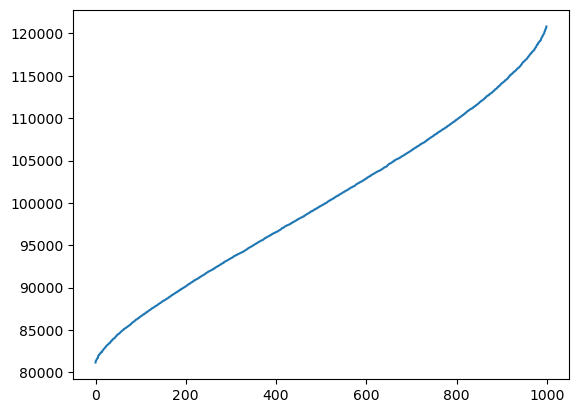

In [11]:
plt.figure()

plt.plot(EvalsWOE)

plt.show()

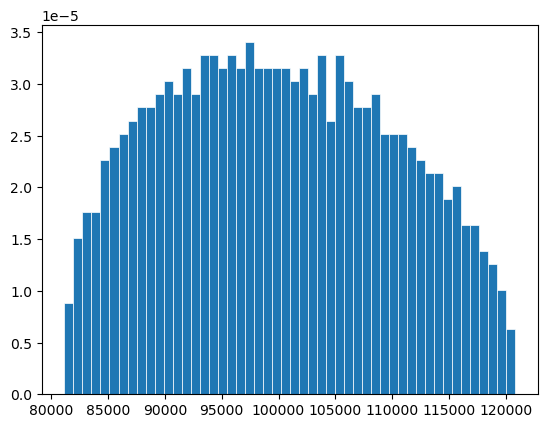

In [12]:
plt.figure()

plt.hist(EvalsWOE,bins=50,density=True,linewidth=0.5, edgecolor="white")

plt.show()

In [13]:
EvalsWOENorm = EvalsWOE / EvalsWOE.max()

In [14]:
EvalsWOENorm.sum()

np.float64(827.6813501257982)

In [15]:
histEvlasWOE , binsWOE = np.histogram(EvalsWOENorm,bins=50)

In [16]:
histNormWOE = histEvlasWOE/T

In [17]:
histNormWOE.sum()

np.float64(0.01)

In [18]:
bin_centers = (binsWOE[:-1] + binsWOE[1:]) / 2

In [19]:
def marchpast(l, g):
    "Marchenko-Pastur distribución"
    def m0(a):
        "Maximo por elemento (a,0)"
        return np.maximum(a, np.zeros_like(a))
    gplus=(1+g**0.5)**2
    gminus=(1-g**0.5)**2
    return np.sqrt( m0(gplus  - l) *  m0(l- gminus)) / ( 2*np.pi*l)

In [20]:
x = np.linspace((1-(T/N)**0.5)**2,(1+(T/N)**0.5)**2,1000) 
plam = marchpast(x,T/N) 
#plam2 = Plam2(T,N,x)

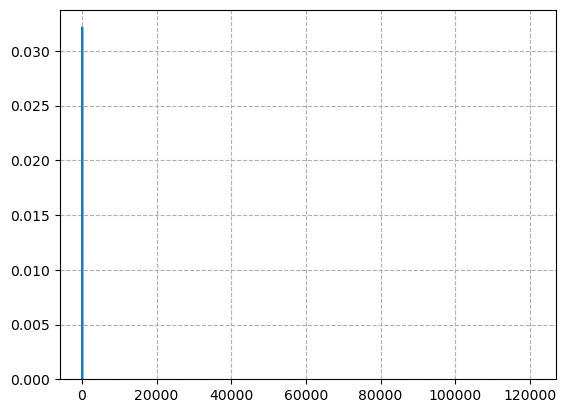

In [21]:
plt.figure()

plt.plot(x,plam)
plt.hist(EvalsWOE,bins=50,density=True,linewidth=0.5, edgecolor="white")
plt.grid(True,linestyle='--')

plt.show()

In [22]:
50/100

0.5

In [23]:
r = (EvalsWOE[1:-1] - EvalsWOE[2:]) / (EvalsWOE[:-2] - EvalsWOE[1:-1])

In [24]:
def Pr(r):
    return (27/8) * (r+r**2) / (1+r+r**2)**(5/2)

In [25]:
def PrW(r):
    return (32*(1+r**2))/((2+r)**5)

In [26]:
rdom = np.linspace(0,8,1000)

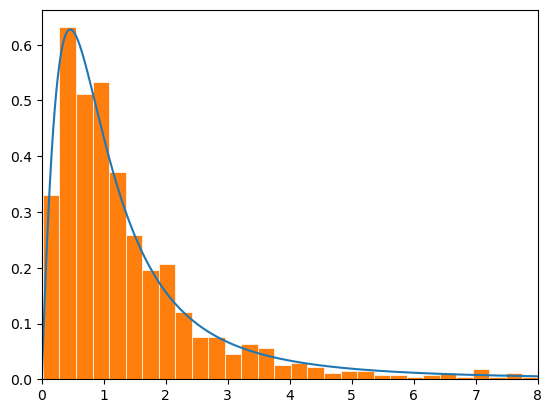

In [27]:
plt.figure()

plt.plot(rdom,Pr(rdom))
plt.hist(r,bins=300,density=True,linewidth=0.5, edgecolor="white")
plt.xlim(0,8)

plt.show()

In [28]:
MatWUE = WUE((N,T))

In [29]:
EvalsWUE = np.linalg.eigvalsh(MatWUE)

In [30]:
x = np.linspace((1-(T/N)**0.5)**2,(1+(T/N)**0.5)**2,1000) 
plam = marchpast(x,T/N) 

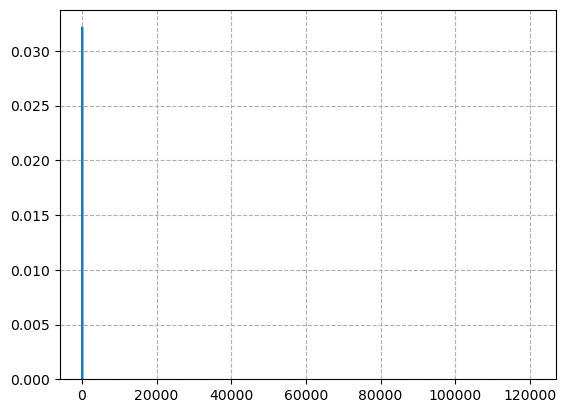

In [31]:
plt.figure()

plt.plot(x,plam)
plt.hist(EvalsWOE,bins=50,density=True,linewidth=0.5, edgecolor="white")
plt.grid(True,linestyle='--')

plt.show()

In [32]:
def Pr2(r):
    return ((81* np.sqrt(3))/(4*np.pi)) * ((r+r**2)**2 / (1+r+r**2)**4)

In [33]:
r = (EvalsWOE[1:-1] - EvalsWOE[2:]) / (EvalsWOE[:-2] - EvalsWOE[1:-1])

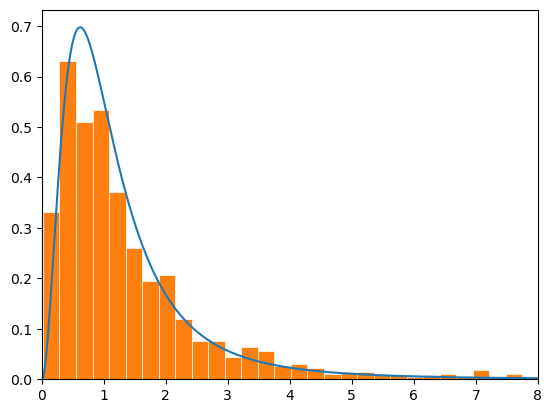

In [34]:
plt.figure()

plt.plot(rdom,Pr2(rdom))
plt.hist(r,bins=300,density=True,linewidth=0.5, edgecolor="white")
plt.xlim(0,8)

plt.show()

In [ ]:
MatWSE = WSE((N,T))

In [77]:
EvalsWSE = np.linalg.eigvalsh(MatWSE)

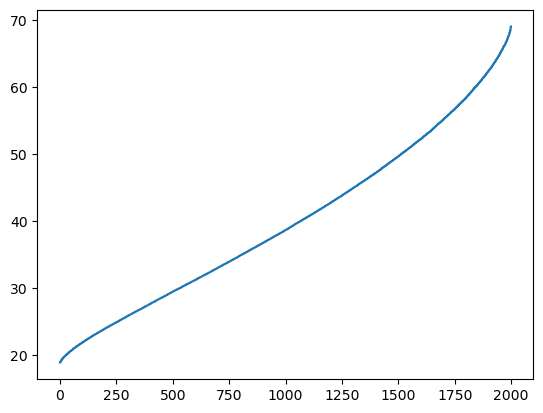

In [78]:
plt.figure()

plt.plot(EvalsWSE)

plt.show()

In [79]:
(EvalsWSE/80001869.37965775).sum()

np.float64(0.000999851999513743)

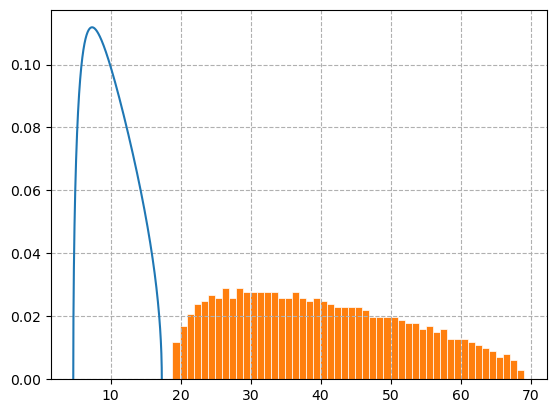

In [84]:
plt.figure()

plt.plot(x,plam)
plt.hist(EvalsWSE[::2],bins=50,density=True,linewidth=0.5, edgecolor="white")
plt.grid(True,linestyle='--')

plt.show()

In [2]:
import sys
import os

sys.path.append("/home/michicol/Desktop/Practicas Profesionales/build")

import wishart_module as woe

In [ ]:
WOEcpp = woe.calcular_wishart(10000,100000)

: 

[[2.35979231581347, -1.3542008120910383],
 [-1.3542008120910383, 1.9590064618400094]]